#### imports

In [1]:
from keras.preprocessing.text import Tokenizer, text_to_word_sequence

Using TensorFlow backend.


In [2]:
with open('./data/alice.en') as f:
    input_lines = f.read().splitlines()
en_tokenizer = Tokenizer(lower=True, split="", filters='', char_level=True)
en_tokenizer.fit_on_texts(input_lines)
# vocabulary:
print(en_tokenizer.word_index)
# get sequences
input_seqs = en_tokenizer.texts_to_sequences(input_lines)
print('sample seq:')
for i, (line, seq) in enumerate(zip(input_lines[:2], input_seqs[:2])):
    print('  line {}:'.format(i + 1))
    print('    text  > {}'.format(line))
    print('    seq   > {}'.format(seq))

{' ': 1, 'e': 2, 't': 3, 'a': 4, 'o': 5, 'i': 6, 'n': 7, 'h': 8, 's': 9, 'r': 10, 'd': 11, 'l': 12, 'u': 13, 'c': 14, 'w': 15, 'g': 16, 'y': 17, ',': 18, 'm': 19, 'f': 20, 'p': 21, '’': 22, 'b': 23, 'k': 24, '.': 25, '‘': 26, 'v': 27, '-': 28, '!': 29, ':': 30, 'j': 31, 'q': 32, '?': 33, ';': 34, 'x': 35, '*': 36, 'z': 37, ')': 38, '“': 39, '(': 40, '1': 41, '”': 42, '/': 43, '0': 44, '5': 45, '3': 46, '2': 47, '8': 48, '9': 49, '4': 50, '6': 51, '[': 52, '7': 53, '_': 54, ']': 55, '@': 56, '$': 57, '#': 58, '%': 59}
sample seq:
  line 1:
    text  > project gutenberg’s alice’s adventures in wonderland , by lewis carroll
    seq   > [21, 10, 5, 31, 2, 14, 3, 1, 16, 13, 3, 2, 7, 23, 2, 10, 16, 22, 9, 1, 4, 12, 6, 14, 2, 22, 9, 1, 4, 11, 27, 2, 7, 3, 13, 10, 2, 9, 1, 6, 7, 1, 15, 5, 7, 11, 2, 10, 12, 4, 7, 11, 1, 18, 1, 23, 17, 1, 12, 2, 15, 6, 9, 1, 14, 4, 10, 10, 5, 12, 12]
  line 2:
    text  > this ebook is for the use of anyone anywhere at no cost and with
    seq   > [3, 8, 6, 9, 1

In [3]:
# pre process the output data : alice.x
with open('./data/alice.x') as f:
    output_lines = f.read().splitlines()
    #output_lines_cs = list(map(char_seq, output_lines))
print('no. of lines {}'.format(len(output_lines)))
# tokenizer which makes the text lower case and split by space
x_tokenizer = Tokenizer(lower=True, split=" ", filters='', char_level=True)
x_tokenizer.fit_on_texts(output_lines)

# vocabulary:
print('vocabulary size: {}'.format(len(x_tokenizer.word_index)))
print('vocabulary: {}'.format(x_tokenizer.word_index))

# get sequences
output_seqs = x_tokenizer.texts_to_sequences(output_lines)
print('sample seq:')
for i, (line, seq) in enumerate(zip(output_lines[:2], output_seqs[:2])):
    print('  line {}:'.format(i + 1))
    print('    text  > {}'.format(line))
    print('    seq   > {}'.format(seq))


no. of lines 2791
vocabulary size: 59
vocabulary: {' ': 1, '5': 2, 'x': 3, '4': 4, 'w': 5, 'f': 6, '?': 7, ']': 8, 'u': 9, 'c': 10, 't': 11, '-': 12, '6': 13, '7': 14, 'r': 15, '’': 16, '[': 17, '$': 18, ':': 19, ';': 20, 's': 21, '”': 22, 'e': 23, '!': 24, 'q': 25, '_': 26, '/': 27, '1': 28, '#': 29, 'p': 30, '%': 31, 'v': 32, 'k': 33, '9': 34, '“': 35, 'b': 36, '‘': 37, 'd': 38, '8': 39, 'z': 40, 'y': 41, ')': 42, '2': 43, '(': 44, '3': 45, 'l': 46, 'h': 47, 'g': 48, 'o': 49, 'j': 50, ',': 51, 'm': 52, '0': 53, '.': 54, '@': 55, '*': 56, 'n': 57, 'i': 58, 'a': 59}
sample seq:
  line 1:
    text  > scw%57x ’6x5?e5c’”u 4-f75”u 4t/5?x6c5u f? rw?t5c-4?t $ e[ -5rfu 74ccw--
    seq   > [21, 10, 5, 31, 2, 14, 3, 1, 16, 13, 3, 2, 7, 23, 2, 10, 16, 22, 9, 1, 4, 12, 6, 14, 2, 22, 9, 1, 4, 11, 27, 2, 7, 3, 13, 10, 2, 9, 1, 6, 7, 1, 15, 5, 7, 11, 2, 10, 12, 4, 7, 11, 1, 18, 1, 23, 17, 1, 12, 2, 15, 6, 9, 1, 14, 4, 10, 10, 5, 12, 12]
  line 2:
    text  > x]fu 5eww! fu ;wc x]5 6u5 w; 4?[w?5 4?[r]

In [4]:
import numpy as np
import tensorflow as tf
import helpers

tf.reset_default_graph()
sess = tf.InteractiveSession()

In [5]:
tf.__version__

'1.2.0'

In [6]:
PAD = 0 # Padding at the end of char seq or word to make a batch of same size
EOS = 60 # using 60 because 1 - 59 is used in vocab; for end of seq. tag

vocab_size = len(en_tokenizer.word_index) + 2 # + 2 for PAD and EOS
input_embedding_size = 16 # 20 or 32

encoder_hidden_units = 20
decoder_hidden_units = encoder_hidden_units

In [7]:
# placeholders for encoder inputs, decoder input and decoder targets
# we don't define the shape (size) of encoder inputs / decoder targets as it will depend on batch size
encoder_inputs = tf.placeholder(shape=(None, None), dtype=tf.int32, name='encoder_inputs')
decoder_targets = tf.placeholder(shape=(None, None), dtype=tf.int32, name='decoder_targets')
# similarly decoder inputs' shape (size) is dynamic - batch dependent
''' disable for new decoder rnn
decoder_inputs = tf.placeholder(shape=(None, None), dtype=tf.int32, name='decoder_inputs')
'''
# ^^^ gets map to previous decoder output during rollout - but during training we want to 
#   input the target inspite of whatever the decoder output is

## adding placeholder for encoder inputs length, to use it for new decoder rnn
# where this can be used as a reference for decoder input/time step length
encoder_inputs_length = tf.placeholder(shape=(None,), dtype=tf.int32, name='encoder_inputs_length')

In [8]:
# random initialization of embedding
# word embedding help us reduce the dimension of data for network training
embeddings = tf.Variable(tf.random_uniform([vocab_size, input_embedding_size], -1.0, 1.0), dtype=tf.float32)

In [9]:
# need to understand how this embedding look up works ??
encoder_inputs_embedded = tf.nn.embedding_lookup(embeddings, encoder_inputs)
''' disable for new decoder rnn
decoder_inputs_embedded = tf.nn.embedding_lookup(embeddings, decoder_inputs)
'''

' disable for new decoder rnn\ndecoder_inputs_embedded = tf.nn.embedding_lookup(embeddings, decoder_inputs)\n'

In [10]:
# define encoder cell - using an LSTMCell
encoder_cell = tf.contrib.rnn.LSTMCell(encoder_hidden_units)
# defined attention length randomnly - need to analysis the input data and maybe define based on that
attention_length = 10 
# add a attention wrapper around encoder cell
encoder_cell_w_attention = tf.contrib.rnn.AttentionCellWrapper(encoder_cell, attention_length, state_is_tuple=True)
# define encoder rnn
encoder_outputs, encoder_final_state = tf.nn.dynamic_rnn(
    encoder_cell_w_attention, encoder_inputs_embedded,
    sequence_length=encoder_inputs_length, # added this to use it back in decoder scratch rnn
    dtype=tf.float32, time_major=True,
)


''' now we don't delete encoder_output as it will be use in attention for decoder'''
#del encoder_outputs

" now we don't delete encoder_output as it will be use in attention for decoder"

##### Different Decoder
Defining a new decoder using raw_rnn in which input to next timestep if output of previous timestep unlike earlier when the decoder input for each timestep was given.

###### following catch or issue
* how to define length of decoder output / length of time steps / how far to run the decoder
    * stop after fix no. of run
    * let the network stop on its own?? - how??
* inital hidden state is same as earlier decoder rnn, which is: encoder's final state
* can we speedup training by providing decoder input in this layer or mix its with decoder output??

Ref: [Advanced dynamic seq2seq with TensorFlow](https://github.com/ematvey/tensorflow-seq2seq-tutorials/blob/master/2-seq2seq-advanced.ipynb)


In [11]:
# set decoder cell
decoder_cell = tf.contrib.rnn.LSTMCell(decoder_hidden_units)
decoder_cell_w_attention = tf.contrib.rnn.AttentionCellWrapper(decoder_cell, attention_length, state_is_tuple=True)
#get maximum time step from input data use that to set the decoder output timestep
encoder_max_time, batch_size = tf.unstack(tf.shape(encoder_inputs))

In [12]:
# for now define it a fixed length based on encoder input length e.g. +3
decoder_lengths = encoder_inputs_length + 3 

In [13]:
# define wieght and bias for the hidden layer  to output layer which map it to vocab 
# unlike earlier we used the existing linear layer
# this will be clear later why we did this but for now it is needed as we will be giving input to next decoder time-step
# and we have to pass this W and b in each run and earlier it was used internally and we never needed it
# but now we are defining the decoder rnn from scratch we also need to do this
W = tf.Variable(tf.random_uniform([decoder_hidden_units, vocab_size], -1, 1), dtype=tf.float32)
b = tf.Variable(tf.zeros([vocab_size]), dtype=tf.float32)

In [14]:
# decoder will work on single vector of column of size: batch_size in a single time step
# EOS = end of sentence tag: defined but not used earlier - need to check how it can be used
assert EOS == 60 and PAD == 0

# defining for particular timestep of the current batch_size
eos_time_slice = tf.ones([batch_size], dtype=tf.int32, name='EOS')
pad_time_slice = tf.zeros([batch_size], dtype=tf.int32, name='PAD')

# embedding of the above
eos_step_embedded = tf.nn.embedding_lookup(embeddings, eos_time_slice)
pad_step_embedded = tf.nn.embedding_lookup(embeddings, pad_time_slice)

##### Transition function
Now we are going to use tf.nn.raw_rnn to create our decoder rnn so that we are able to pass output(generated token) of previous timestep to current timestep. For the we need to define loop transition function.
 * initial loop trasition function i.e. for 0th timestep 
 * other timestep loop transition function
 
Loop transition function is a mapping:  
(time, previous_cell_output, previous_cell_state, previous_loop_state) -> (elements_finished, input, cell_state, output, loop_state).

In [15]:
# initial loop transition function
def loop_fn_initial():
    initial_elements_finished = (0 >= decoder_lengths)  # all False at the initial step
    initial_input = eos_step_embedded # in current scenario it will map to vocab entry with key 1
    initial_cell_state = encoder_final_state
    initial_cell_output = None
    initial_loop_state = None  # we don't need to pass any additional information
    return (initial_elements_finished,
            initial_input,
            initial_cell_state,
            initial_cell_output,
            initial_loop_state)

In [16]:
# loop function for transition
def loop_fn_transition(time, previous_output, previous_state, previous_loop_state):
    # given output (hidden state form) from time t transform into input for t+1 cell
    ##  output(t) -> output projection(t) -> prediction(t) (argmax) -> input embedding(t+1) -> input(t+1)
    def get_next_input() :
        output_logits = tf.add(tf.matmul(previous_output, W), b)
        # out of possible output return max valued output
        prediction = tf.argmax(output_logits, axis=1)
        output = tf.nn.embedding_lookup(embeddings, prediction)
        return output
    elements_finished = (time >= decoder_lengths) # this operation produces boolean tensor of [batch_size]
                                                  # defining if corresponding sequence has ended

    finished = tf.reduce_all(elements_finished) # -> boolean scalar
    next_input = tf.cond(finished, lambda: pad_step_embedded, get_next_input) # if it is already finished
    state = previous_state
    output = previous_output
    loop_state = None

    return (elements_finished, 
            next_input,
            state,
            output,
            loop_state)

In [17]:
#use the above 2 loop functions and define loop fn for rnn 

def loop_fn(time, previous_output, previous_state, previous_loop_state):
    if previous_state is None:    # time == 0
        assert previous_output is None and previous_state is None
        return loop_fn_initial()
    else:
        return loop_fn_transition(time, previous_output, previous_state, previous_loop_state)
# and create the rnn using above loop fn
with tf.variable_scope("myrnn", reuse=None) as scope:
    decoder_outputs_ta, decoder_final_state, _ = tf.nn.raw_rnn(decoder_cell_w_attention, loop_fn)
#
decoder_outputs = decoder_outputs_ta.stack()

In [18]:
# temporary flatten to do logits calculation and prediction
decoder_max_steps, decoder_batch_size, decoder_dim = tf.unstack(tf.shape(decoder_outputs))
decoder_outputs_flat = tf.reshape(decoder_outputs, (-1, decoder_dim))
decoder_logits_flat = tf.add(tf.matmul(decoder_outputs_flat, W), b)
decoder_logits = tf.reshape(decoder_logits_flat, (decoder_max_steps, decoder_batch_size, vocab_size))

decoder_prediction = tf.argmax(decoder_logits, 2)

In [19]:
# defining the entropy function
# i.e. decoder_prediction diff decoder_target energy calculation
stepwise_cross_entropy = tf.nn.softmax_cross_entropy_with_logits(
    labels=tf.one_hot(decoder_targets, depth=vocab_size, dtype=tf.float32),
    logits=decoder_logits,
)

loss = tf.reduce_mean(stepwise_cross_entropy)
train_op = tf.train.AdamOptimizer().minimize(loss)

In [20]:
sess.run(tf.global_variables_initializer())

In [21]:
# defined feed func for new decoder rnn
# get batch data
def next_feed(batch_seq, input_seqs, output_seqs, batch_size):
    start = batch_seq * batch_size
    end = (batch_seq + 1) * batch_size
    batch_ = input_seqs[start:end]
    dbatch_ = output_seqs[start:end]
    encoder_inputs_, encoder_input_lengths_ = helpers.batch(batch_)
    #decoder_targets_, _ = helpers.batch(dbatch_)
    decoder_targets_, _ = helpers.batch([(sequence) + [EOS] + [PAD] * 2 for sequence in dbatch_])
    return {
        encoder_inputs: encoder_inputs_,
        encoder_inputs_length: encoder_input_lengths_,
        decoder_targets: decoder_targets_,
    }

In [25]:
loss_track = []
batch_size = 10
max_batches = 200
batches_in_epoch = 199
training_data_size = max_batches * batch_size # 2000

## get the validation data
vd_batch_size = 200
vd = next_feed(0, input_seqs[training_data_size:], output_seqs[training_data_size:], vd_batch_size)
print(vd[encoder_inputs].shape)
vd_loss_track = []

(78, 200)


In [26]:
# running the trainning epoch

writer = tf.summary.FileWriter('logs', sess.graph)

try:
    ## set the no. of epoch to run the trainning for here
    for epoch in range(2):
        print('==> epoch {}:'.format(epoch + 1))
        for batch in range(max_batches):
            #print(input_seqs)
            fd = next_feed(batch, input_seqs, output_seqs, batch_size)
            _, l = sess.run([train_op, loss], fd)
            loss_track.append(l)
            #calculate validation loss
            vl = sess.run(loss, vd)
            vd_loss_track.append(vl)

            if batch == 0 or batch % batches_in_epoch == 0:
                print('batch {}'.format(batch))
                print('  minibatch loss: {}'.format(sess.run(loss, fd)))
                predict_ = sess.run(decoder_prediction, fd)
                for i, (inp, pred) in enumerate(zip(fd[encoder_inputs].T, predict_.T)):
                    print('  sample {}:'.format(i + 1))
                    print('    input     > {}'.format(inp))
                    print('    predicted > {}'.format(pred))
                    if i >= 2:
                        break
                print()
except KeyboardInterrupt:
    print('training interrupted')

writer.close()

==> epoch 1:
batch 0
  minibatch loss: 3.3645811080932617
  sample 1:
    input     > [21 10  5 31  2 14  3  1 16 13  3  2  7 23  2 10 16 22  9  1  4 12  6 14  2
 22  9  1  4 11 27  2  7  3 13 10  2  9  1  6  7  1 15  5  7 11  2 10 12  4
  7 11  1 18  1 23 17  1 12  2 15  6  9  1 14  4 10 10  5 12 12]
    predicted > [26 26  2  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]
  sample 2:
    input     > [ 3  8  6  9  1  2 23  5  5 24  1  6  9  1 20  5 10  1  3  8  2  1 13  9  2
  1  5 20  1  4  7 17  5  7  2  1  4  7 17 15  8  2 10  2  1  4  3  1  7  5
  1 14  5  9  3  1  4  7 11  1 15  6  3  8  0  0  0  0  0  0  0]
    predicted > [26  2  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1

loss 2.9812 after 4000 examples (batch_size=10)


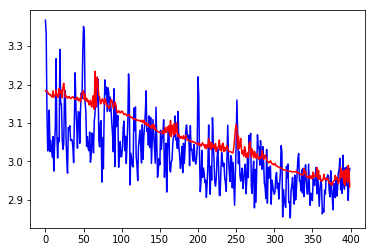

In [27]:
# plot trainning loss
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(loss_track, 'b', vd_loss_track, 'r')
print('loss {:.4f} after {} examples (batch_size={})'.format(loss_track[-1], len(loss_track)*batch_size, batch_size))